# GRIP TASK-1 By Rajeswar Sharma
# Predict the percentage of an student based on the no. of study hours. 


In [152]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [153]:
raw_data = pd.read_csv(
    'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')


# Data Exploration

In [154]:
raw_data.shape

(25, 2)

In [155]:
raw_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


The data set contains 25 data points with two attributes i)Hours ii)Score

In [156]:
#Checking for missing values
raw_data.isna().sum() 

Hours     0
Scores    0
dtype: int64

No data is missing 

In [157]:
raw_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### i. The average markes obtained by the students is approximately 51/100, where as average study time is 5 Hr. 


### ii. The meadian values(50%ile) are slightly less the mean values, Data has a minor Positive-Skewness( can be ingnored)  




In [158]:
raw_data['Hours'].quantile(0.5)

4.8

# Data Visualization

<AxesSubplot:>

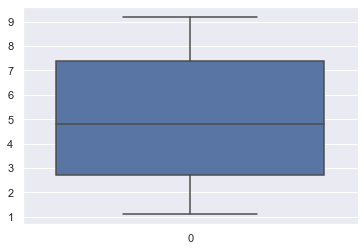

In [159]:
sns.boxplot(data=raw_data['Hours'])

<AxesSubplot:>

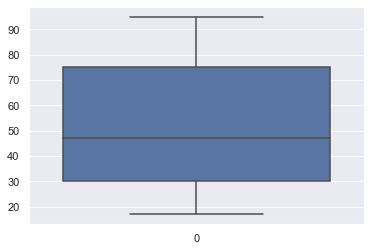

In [160]:
sns.boxplot(data=raw_data['Scores'])

### From the above box plots we can conclude that the data has no outlier so far 

<AxesSubplot:xlabel='Hours', ylabel='Density'>

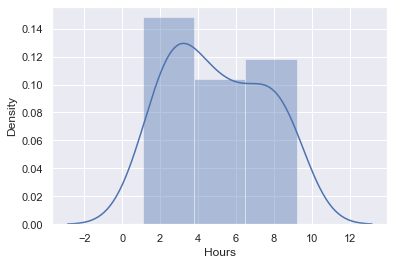

In [161]:
sns.distplot(raw_data['Hours'])

<AxesSubplot:xlabel='Scores', ylabel='Density'>

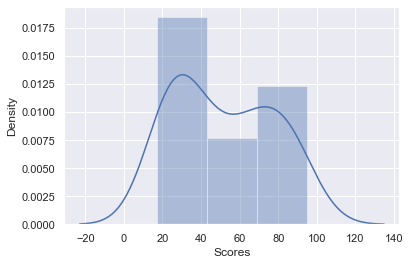

In [162]:
sns.distplot(raw_data['Scores'])

The above confirms slight positive skewness(venial) of the data

# Checking the correlation among the attributes without any transformation

In [163]:
raw_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


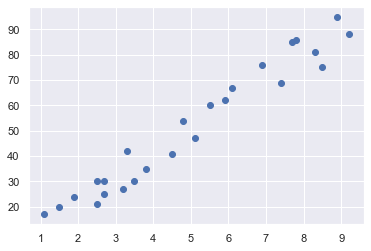

In [164]:
plt.scatter(x=raw_data['Hours'],y=raw_data['Scores'])

In [165]:
transformed_data = pd.DataFrame()
transformed_data['Transformed Hr'] = np.log(raw_data['Hours'])
transformed_data['Transformed Scores']  = np.log(raw_data['Scores'])

<AxesSubplot:xlabel='Transformed Hr', ylabel='Density'>

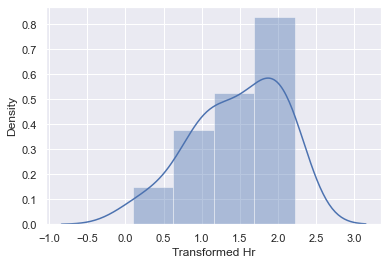

In [190]:
sns.distplot(transformed_data['Transformed Hr'])

<AxesSubplot:xlabel='Transformed Scores', ylabel='Density'>

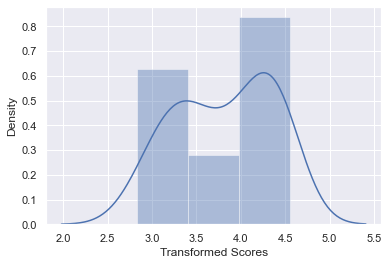

In [167]:
sns.distplot(transformed_data['Transformed Scores'])


## Checking the correlation of transformed Data
#### Performing Logarithmic transfromtion to the positively skewed data to make is Normaly Distributed

In [168]:
transformed_data.corr()

,Transformed Hr,Transformed Scores
Transformed Hr,1.000000,0.966251
Transformed Scores,0.966251,1.000000


#### No significant improvement in the correlation. 

## Performing Linear Regression

In [169]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

In [170]:
x = np.array(raw_data['Hours']).reshape((-1,1))
y = np.array(raw_data['Scores']).reshape((-1,1))

## Splitting Training and Testing set

In [171]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [179]:
model = LR()
model.fit(x_train,y_train)
w0 = model.intercept_[0]
w1 = model.coef_[0][0]
print("R square value (Training): "+str(model.score(x_train,y_train)))
y_pred = model.predict(x_test)
print("R square value (Test set): "+str(model.score(x_test, y_test)))
print("MAE value (Training): "+str(MAE(model.predict(x_train), y_train)))
print("MAE (Test set): "+str(MAE(model.predict(x_test), y_test)))


R square value (Training): 0.9515510725211552
R square value (Test set): 0.9454906892105355
MAE value (Training): 5.186601709180371
MAE (Test set): 4.183859899002975


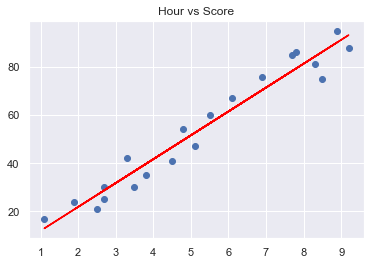

In [188]:
plt.scatter(x_train,y_train)
plt.plot(x_train,w0+w1*x_train,color='red')
plt.title('Hour vs Score')
plt.show()

#### The r2 scores of the model on training set and on the testing set are really good.

## Verifying the homoscedasticity of error terms

### On Training set

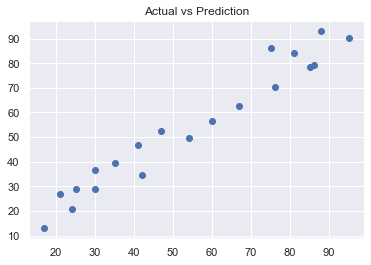

In [173]:
y_train_pred = model.predict(x_train)
plt.title('Actual vs Prediction')
plt.scatter(y_train, y_train_pred)

<AxesSubplot:ylabel='Density'>

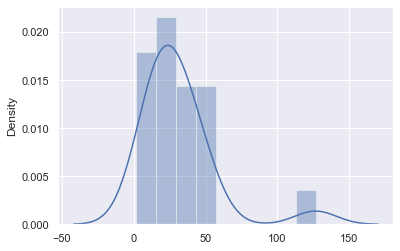

In [174]:
sns.distplot((y_train_pred-y_train)**2)

### On testing set

<AxesSubplot:ylabel='Density'>

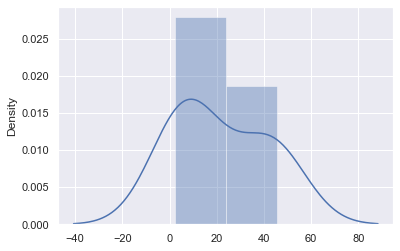

In [175]:
sns.distplot((y_pred-y_test)**2)

## From the above plots we can conclude that Error terms are Homoscedastic in nature 

In [177]:
p = w0+w1*9.25
print("Predicted score of 9.25Hr of study time: "+str(p))

Predicted score of 9.25Hr of study time: 93.69173248737535
